In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder

2025-04-21 22:46:34.395355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745255794.413117   13000 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745255794.418284   13000 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-21 22:46:34.437178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('eCommerce_Customer_support_data.csv')

In [3]:
df[300:400]

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
300,c146c04b-88d5-4d96-8cb8-f8bb5d58492f,Outcall,Returns,Reverse Pickup Enquiry,NaN,1049cbaa-c61a-49b9-8de0-e7f69b772aa8,NaN,02/08/2023 19:34,02/08/2023 19:39,02-Aug-23,NaN,NaN,NaN,NaN,Brandon Goodwin,Ethan Tan,Michael Lee,>90,Evening,5
301,3a948fb2-1e60-4994-a264-75051acc42b2,Inbound,Order Related,Delayed,NaN,3827f850-b11d-4e4c-be75-1572471619b8,16/07/2023 10:03,01/08/2023 10:02,01/08/2023 10:03,01-Aug-23,MADHUBANI,Furniture,7499.0,NaN,Theresa Stewart,Madison Kim,John Smith,>90,Morning,5
302,35379f87-9aec-4243-99e0-484707a50e01,Inbound,Returns,Exchange / Replacement,NaN,52795f61-041d-4db1-96ad-d1bb27cb3fa3,15/07/2023 22:03,01/08/2023 08:48,01/08/2023 11:15,01-Aug-23,GHAZIABAD,Mobile,47999.0,NaN,Alexandra Reynolds,Zoe Yamamoto,John Smith,>90,Morning,5
303,a31d4218-7e34-402d-8311-cde1f4315750,Inbound,Returns,Reverse Pickup Enquiry,NaN,c54a61a4-85d1-45b3-81b1-7f330ef948c3,13/07/2023 22:32,01/08/2023 17:01,01/08/2023 17:03,01-Aug-23,AMBAD,Electronics,199.0,NaN,Zachary Simpson,Mia Patel,Emily Chen,61-90,Evening,1
304,5395b948-faf4-4512-a732-ae6a794b242a,Inbound,Shopzilla Related,General Enquiry,Reduce time,b88c83c4-0973-4ed6-b977-fd49229a5413,NaN,02/08/2023 11:06,02/08/2023 11:10,02-Aug-23,NaN,NaN,NaN,NaN,Jennifer Lewis,Madison Kim,John Smith,>90,Morning,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,a91eb49b-00b0-4350-8caa-8d25d464fb14,Inbound,Returns,Damaged,Thanks,a39b4dc0-38a8-4f2d-bb39-e1bd990fdc49,NaN,01/08/2023 12:30,01/08/2023 12:35,01-Aug-23,NaN,NaN,NaN,NaN,Shelly Bell,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning,5
396,6486659c-2697-498a-a5f7-284c7baf4812,Inbound,Order Related,Order status enquiry,NaN,560f8005-ffbf-45fd-95a3-3cfc1aa27e46,NaN,01/08/2023 16:19,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Lindsey Smith,Nathan Patel,John Smith,>90,Afternoon,5
397,5b7525c3-cdfc-4465-a36b-f2e85a209c9a,Email,Order Related,Installation/demo,NaN,6354b5f3-3179-428f-9bb8-76f5d70c6834,NaN,02/08/2023 18:20,02/08/2023 18:26,02-Aug-23,NaN,NaN,NaN,NaN,David Williamson,Carter Park,Jennifer Nguyen,On Job Training,Evening,1
398,095a9b11-9939-462d-b2cc-f5a023cfa4c7,Outcall,Returns,Exchange / Replacement,Not at all happy with Shopzilla worst experien...,87f214fb-48c4-4bcd-8c3d-1c38e4b3628a,NaN,02/08/2023 21:12,02/08/2023 22:39,02-Aug-23,NaN,NaN,NaN,NaN,Kristin Campbell,Ethan Tan,Michael Lee,>90,Evening,3


In [4]:
df.shape

(85907, 20)

In [5]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [6]:
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [7]:
# 4 Columns has more then 70% missing values so i can remove these from the dataframe
df.drop(['Customer_City','Product_category','Item_price','connected_handling_time','order_date_time','Customer Remarks'],axis=1, inplace= True)

In [8]:
# Since Order id is not useful we can also drop this
df.drop(['Order_id','Unique id'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

In [10]:
df.shape

(85907, 12)

In [11]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score'],
      dtype='object')

## EDA (Exploratory Data Analysis)

#### 1. Distribution of CSAT Scores

/tmp/ipykernel_13000/4027431522.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CSAT Score', palette='Set2')


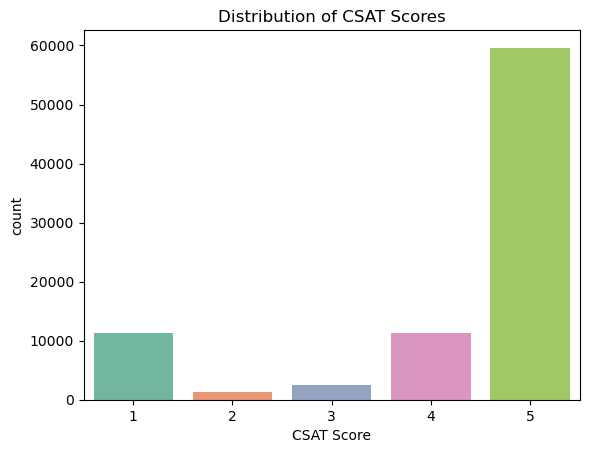

In [12]:
sns.countplot(data=df, x='CSAT Score', palette='Set2')
plt.title('Distribution of CSAT Scores')
plt.show()


### Insights: 
- CSAT Score 5 has around 57k+ rating values which is higher
- CSAT Score 2 has lowest rating values

#### 2. CSAT Score by Channel Name

/tmp/ipykernel_13000/339963366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='Set3')


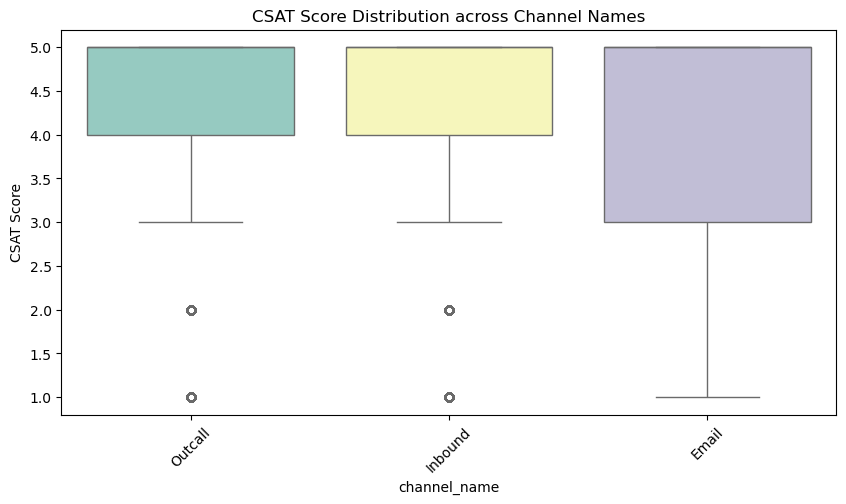

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='Set3')
plt.title('CSAT Score Distribution across Channel Names')
plt.xticks(rotation=45)
plt.show()


### Insights: 
- channel Outcall and Inbound has some outliers
- Channel Email doesn't have any outliers

/tmp/ipykernel_13000/3481158963.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sub-category', y='CSAT Score', estimator=np.mean, ci=None, palette='coolwarm')
/tmp/ipykernel_13000/3481158963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sub-category', y='CSAT Score', estimator=np.mean, ci=None, palette='coolwarm')


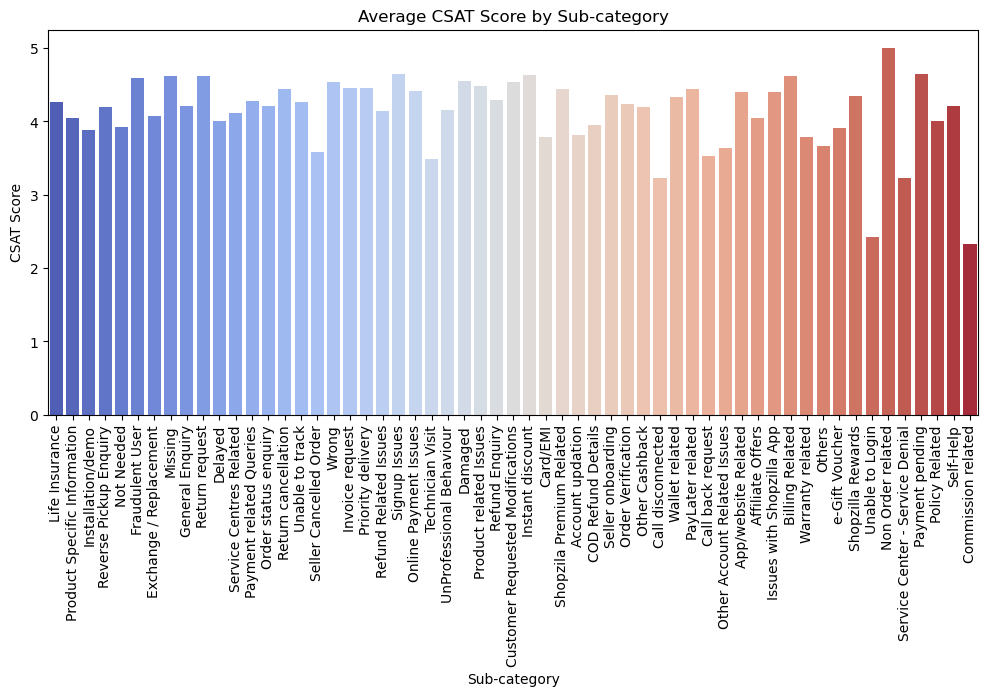

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Sub-category', y='CSAT Score', estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Average CSAT Score by Sub-category')
plt.xticks(rotation=90)
plt.show()


### Insights: 
- Sub category Non-order related has maximum values
- Sub category Commission related has minimum value

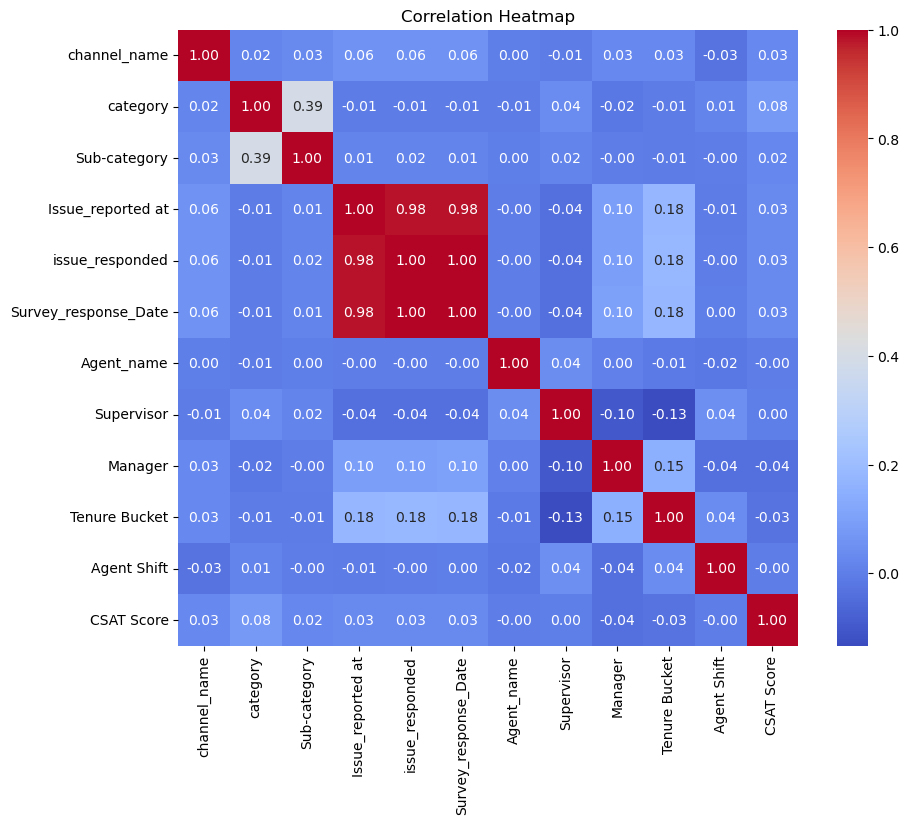

In [15]:
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include='object'):
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

plt.figure(figsize=(10,8))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Insights: 
- Issue_reported_at, issue_responded, Survey_response_Date are co-related to each others

In [16]:
## Feature Engineering
df.head(2)

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5


In [17]:
""" 
convert Issue_reported at, issue_responded & Survey_response_Date to datetime format
"""
# Convert 'Issue_reported at' and 'issue_responded' to datetime (with time)
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

# Convert 'Survey_response_Date' to datetime (without time)
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='%d-%b-%y')



In [18]:
# Check datetime columns
datetime_cols = df.select_dtypes(include=['datetime', 'datetime64[ns]']).columns
print("Datetime columns:", datetime_cols)


Datetime columns: Index(['Issue_reported at', 'issue_responded', 'Survey_response_Date'], dtype='object')


In [19]:
for col in datetime_cols:
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_day'] = df[col].dt.day
    df[col + '_month'] = df[col].dt.month
    df[col + '_weekday'] = df[col].dt.weekday

# Then drop the original datetime columns
df = df.drop(columns=datetime_cols)

In [20]:
df.head(2)

,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported at_hour,...,Issue_reported at_month,Issue_reported at_weekday,issue_responded_hour,issue_responded_day,issue_responded_month,issue_responded_weekday,Survey_response_Date_hour,Survey_response_Date_day,Survey_response_Date_month,Survey_response_Date_weekday
0,Outcall,Product Queries,Life Insurance,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,11,...,8,1,11,1,8,1,0,1,8,1
1,Outcall,Product Queries,Product Specific Information,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,12,...,8,1,12,1,8,1,0,1,8,1


In [ ]:
df['Agent Shift'].value_counts()

Agent Shift
Morning      41426
Evening      33677
Afternoon     5840
Split         3648
Night         1316
Name: count, dtype: int64

In [22]:
df['Manager'] = df["Manager"].map({'John Smith':0,'Michael Lee':1,'Jennifer Nguyen':2,'Emily Chen':3,'William Kim':4,'Olivia Tan':5})

In [23]:
le = LabelEncoder()
df['Agent Shift'] = le.fit_transform(df['Agent Shift'])
df['Tenure Bucket'] = le.fit_transform(df['Tenure Bucket'])
df['channel_name'] = le.fit_transform(df['channel_name'])
df['category'] = le.fit_transform(df['category'])

In [24]:

encoder = TargetEncoder()
df['Agent_name'] = encoder.fit_transform(df['Agent_name'], df['CSAT Score'])
df['Supervisor'] = encoder.fit_transform(df['Supervisor'], df['CSAT Score'])
df['Sub-category'] = encoder.fit_transform(df['Sub-category'], df['CSAT Score'])

In [25]:
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   channel_name                  85907 non-null  int64  
 1   category                      85907 non-null  int64  
 2   Sub-category                  85907 non-null  float64
 3   Agent_name                    85907 non-null  float64
 4   Supervisor                    85907 non-null  float64
 5   Manager                       85907 non-null  int64  
 6   Tenure Bucket                 85907 non-null  int64  
 7   Agent Shift                   85907 non-null  int64  
 8   CSAT Score                    85907 non-null  int64  
 9   Issue_reported at_hour        85907 non-null  int32  
 10  Issue_reported at_day         85907 non-null  int32  
 11  Issue_reported at_month       85907 non-null  int32  
 12  Issue_reported at_weekday     85907 non-null  int32  
 13  i

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [41]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6811 - loss: 0.9820 - val_accuracy: 0.6970 - val_loss: 0.9265
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6932 - loss: 0.9251 - val_accuracy: 0.6964 - val_loss: 0.9154
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6994 - loss: 0.9059 - val_accuracy: 0.6977 - val_loss: 0.9087
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6951 - loss: 0.9068 - val_accuracy: 0.6972 - val_loss: 0.9091
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6950 - loss: 0.9082 - val_accuracy: 0.6980 - val_loss: 0.9085
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6958 - loss: 0.9040 - val_accuracy: 0.6980 - val_loss: 0.9058
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6979 - loss: 0.9029 - val_accuracy: 0.6970 - val_loss: 0.9072
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6949 - loss: 0.9079 - 

In [35]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
              precision    recall  f1-score   support

           1       0.51      0.10      0.16      2241
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       503
           4       0.00      0.00      0.00      2277
           5       0.70      0.99      0.82     11934

    accuracy                           0.70     17182
   macro avg       0.24      0.22      0.20     17182
weighted avg       0.55      0.70      0.59     17182

[[  216     0     0     0  2025]
 [   12     0     0     0   215]
 [   15     0     0     0   488]
 [   34     0     0     0  2243]
 [  149     0     0     0 11785]]


/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

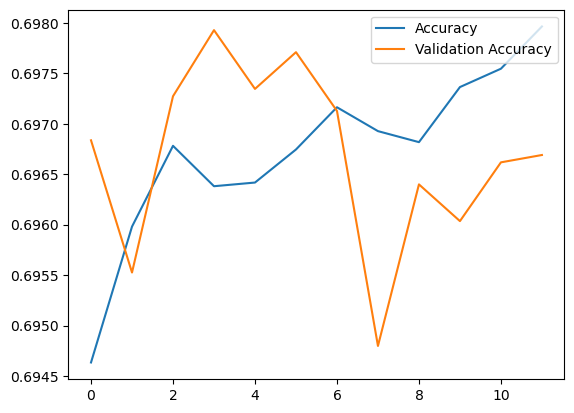

In [36]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [37]:
model.save("ann_model_csat.h5")